In [12]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

Documentation for Spotify audio features data: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [13]:
df = pd.read_json('src/all_tracks.json')

In [14]:
df

,Album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
The Modern Age - Rough Trade Version,The Singles - Volume 01,0.493,0.787,2,-7.712,1,0.0334,0.022400,0.002270,0.2530,0.880,160.120,4,192.85365
Last Nite - Rough Trade Version - The Modern Age B-Side,The Singles - Volume 01,0.399,0.745,0,-7.497,1,0.0329,0.043800,0.000000,0.1120,0.514,207.923,4,198.54926
Hard To Explain,Is This It,0.408,0.666,7,-6.286,1,0.0578,0.000455,0.862000,0.0889,0.666,82.523,4,224.33333
New York City Cops (Hard to Explain B-Side),The Singles - Volume 01,0.520,0.842,0,-7.664,1,0.0352,0.063300,0.000045,0.3840,0.512,107.958,4,209.50508
Last Nite,Is This It,0.624,0.899,0,-5.709,1,0.0296,0.022100,0.000137,0.0975,0.790,104.061,4,193.37334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Call It Fate, Call It Karma",Comedown Machine,0.544,0.241,4,-14.779,0,0.0300,0.983000,0.774000,0.1010,0.359,109.437,4,204.77333
Drag Queen,Future Present Past,0.554,0.546,2,-4.681,0,0.0444,0.080300,0.328000,0.1020,0.507,124.115,4,273.48322
OBLIVIUS,Future Present Past,0.457,0.898,8,-4.350,1,0.0503,0.088500,0.690000,0.2100,0.434,102.979,4,299.15778
Threat of Joy,Future Present Past,0.594,0.728,0,-6.917,1,0.0281,0.216000,0.088100,0.1240,0.687,137.970,4,264.66200


In [15]:
corrplot_df = df.drop(columns=['key','duration'])
corr = corrplot_df.corr(numeric_only = True)

<Axes: >

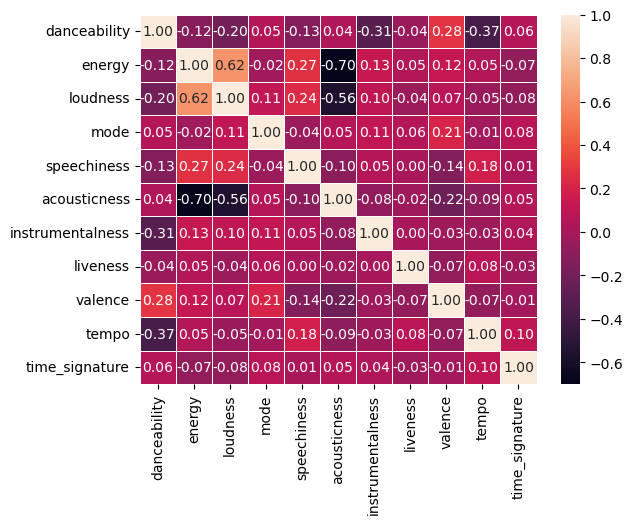

In [16]:
# seaborn heatmap
sns.heatmap(corr,
            annot = True,
            linewidth=.5,
            fmt=".2f")

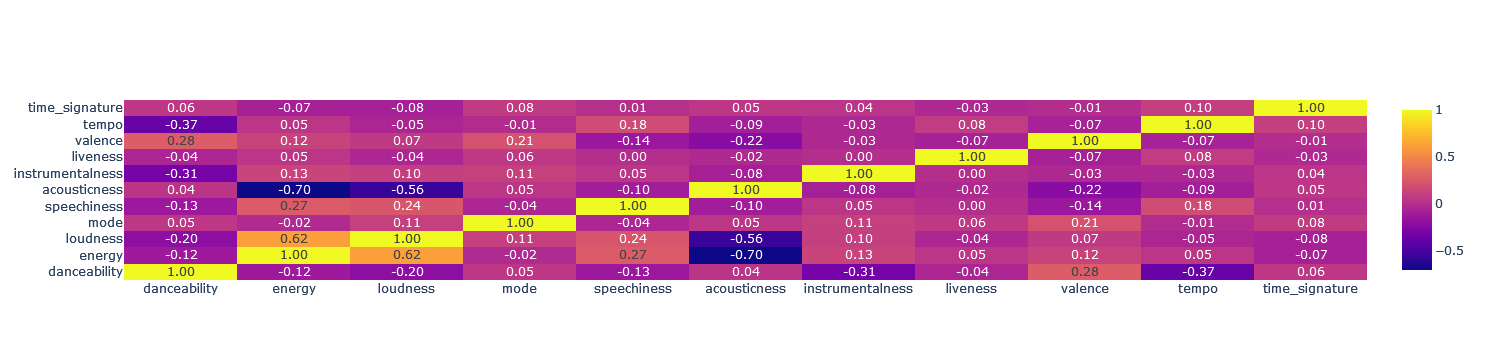

In [17]:
# alternatively (same visualization): plotly heatmap
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}'
    )
)

fig.show()

In [18]:
by_album = df.groupby(by='Album')

In [28]:
by_album.mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
Album,,,,,,,,,,,,,
Angles,0.555000,0.746200,4.500000,-5.756400,0.700000,0.044800,0.094966,0.166427,0.135070,0.563100,143.285700,3.900000,205.293334
Comedown Machine,0.570273,0.718818,4.909091,-7.592909,0.727273,0.038909,0.131501,0.424473,0.176491,0.501364,117.008000,4.000000,217.727275
First Impressions Of Earth,0.467000,0.822500,7.500000,-4.162929,0.785714,0.046000,0.064945,0.429583,0.186636,0.511500,126.323643,3.928571,223.043809
Future Present Past,0.485000,0.750500,3.750000,-5.931000,0.500000,0.045500,0.096279,0.491525,0.174250,0.455250,140.272250,4.000000,292.315657
Is This It,0.532545,0.761182,3.727273,-6.997182,0.818182,0.034464,0.049898,0.268180,0.154691,0.743364,128.572273,4.000000,191.976970
Room On Fire,0.476273,0.750909,6.272727,-4.454545,1.000000,0.034673,0.066942,0.776545,0.160318,0.646727,123.547636,4.000000,180.476365
The New Abnormal,0.507111,0.663111,4.000000,-4.919111,0.777778,0.040400,0.202389,0.061375,0.145611,0.340978,127.807444,4.000000,301.214814
The Singles - Volume 01,0.469583,0.673417,4.083333,-6.918083,0.833333,0.051042,0.181607,0.242428,0.209725,0.553083,144.576250,4.000000,181.327249


In [36]:
stats_by_album = by_album.describe(percentiles=[])

In [37]:
stats_by_album.to_json('src/stats_by_album.json', orient='columns')
stats_by_album.to_excel('src/stats_by_album.xlsx')

next: by top 10 songs
limitations: spotify's audio feature analysis is very under the hood, numbers dont mean all that much